### Features of the data

1. LoanID = Unique Loan ID
2. Gender = Male/ Female
3. Married = Applicant married (Y/N)
4. Dependents = Number of dependents
5. Education = Applicant Education (Graduate/ Under Graduate)
6. SelfEmployed = Self-employed (Y/N)
7. ApplicantIncome = Applicant income
8. CoapplicantIncome = Coapplicant income
9. LoanAmount = Loan amount in thousands
10. LoanAmountTerm = Term of the loan in months
11. CreditHistory = Credit history meets guidelines 
12. PropertyArea = Urban/ Semi-Urban/ Rural
13. LoanStatus = (Target) Loan approved (Y/N)

# Import libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Scientific Calculation
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('./loan_train.csv')


In [3]:
raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
raw_data.shape

(614, 13)

So we have 614 rows and 13 columns in the dataset.

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Preprocessing

## Copy the raw data

In [8]:
data = raw_data.copy(deep=True)

## Dropping unwanted columns

In [ ]:
data.drop(columns=['Loan_ID'])

## Handling missing values

Text(0.5, 1.0, 'Missing Value Bar Plot')

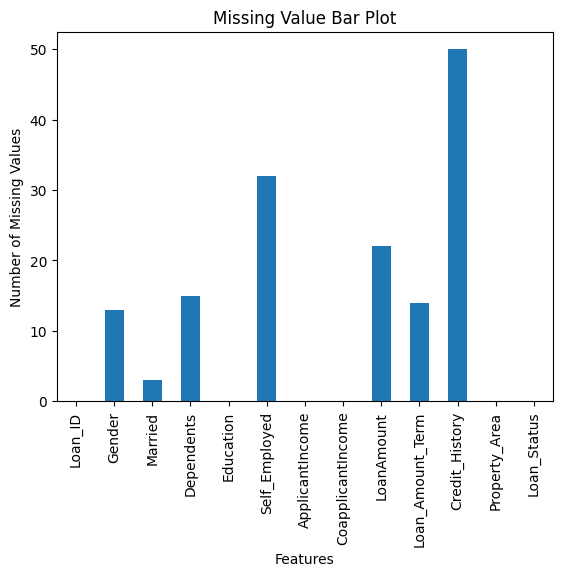

In [38]:
# count the number of missing values in each feature
missing_values = data.isnull().sum()

# create a bar plot of missing values
m1 = missing_values.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.title('Missing Value Bar Plot')

In [22]:
round(data.isnull().sum()/data.shape[0]*100, 2)


Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [25]:
from sklearn.impute import SimpleImputer

impute_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

from sklearn.impute import KNNImputer

impute_knn = KNNImputer(missing_values=np.nan, n_neighbors=5)

